# **Análisis del Dataset**

*Pedro Ruiz - 12/29/2024*

---

En este notebook exploraremos el conjunto de datos **`AG News`**, un conjunto de datos utilizado para la *clasificación de noticias*. Este dataset contiene noticias categorizadas en cuatro clases: **World**, **Sports**, **Business**, y **Sci/Tech**. A lo largo de este análisis, realizaremos diversas **visualizaciones** y **estadísticas** para *comprender mejor* la estructura y características del dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
from wordcloud import WordCloud
from collections import Counter

### **Carga del Dataset**

Para ello utilizaremos la función **`load_dataset`** de la librería *`datasets`* de **Hugging Face**.  

Después de cargar el dataset, utilizamos la función **`type`** para *verificar el tipo de objeto* que hemos cargado.

In [3]:
dataset = load_dataset('ag_news')

print(type(dataset))

<class 'datasets.dataset_dict.DatasetDict'>


La salida obtenida nos indica que el objeto que hemos guardado es de tipo **`DatasetDict`**, que es una estructura de datos proporcionada por la librería *`datasets`*.  

Un **`DatasetDict`** es un *diccionario JSON* que contiene diferentes **splits** del dataset, como **train**, **test**, y **validation**. En este caso, el dataset **`AG News`** contiene los *splits* **train** y **test**.

In [4]:
print(dataset['train'][0])

{'text': "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.", 'label': 2}


Accediendo a la primera entrada, podemos observar que el diccionario contiene dos claves:  

- **`'text'`**: El *texto de la noticia*.  
- **`'label'`**: La *etiqueta de la categoría* de la noticia.

El dataset ya viene preparado para poder trabajar directamente sobre él, pero, para poder explorarlo, vamos a proceder a transformarlo a **`pandas`** y revisar sus *características*.

In [5]:
data_train = pd.DataFrame(dataset['train'])
data_test = pd.DataFrame(dataset['test'])

### **Estadísticas del dataset**

In [6]:
print(data_train.describe(include='all'))

                                                     text          label
count                                              120000  120000.000000
unique                                             120000            NaN
top     Wall St. Bears Claw Back Into the Black (Reute...            NaN
freq                                                    1            NaN
mean                                                  NaN       1.500000
std                                                   NaN       1.118039
min                                                   NaN       0.000000
25%                                                   NaN       0.750000
50%                                                   NaN       1.500000
75%                                                   NaN       2.250000
max                                                   NaN       3.000000


Después de analizar los datos, podemos ir extrayendo conclusiones:  

1. El dataset contiene un total de **120,000 entradas**, lo que lo convierte en un dataset grande que permitirá entrenar modelos de forma robusta.  

2. Todos los textos en el dataset son **únicos**, no se repiten: (*`unique: 120000`*, *`freq: 1`*).  

3. La **media** es de *1.5*, con una **desviación estándar** de *1.12*. Esto indica que las etiquetas están distribuidas de manera muy uniforme entre las diferentes clases:  
   - Las etiquetas se distribuyen de **0 a 3**, lo que confirma que hay **cuatro categorías** en el dataset.  
   - El **25%** de las etiquetas son menores o iguales a *0.75*, el **50% (mediana)** son menores o iguales a *1.5*, y el **75%** son menores o iguales a *2.25*. Esto sugiere que las clases están distribuidas de manera equitativa.  

El dataset es un conjunto de datos **bien trabajado, equilibrado y diverso**, con **textos únicos** y una **distribución uniforme** que evita el sesgo en el entrenamiento de nuestros modelos.

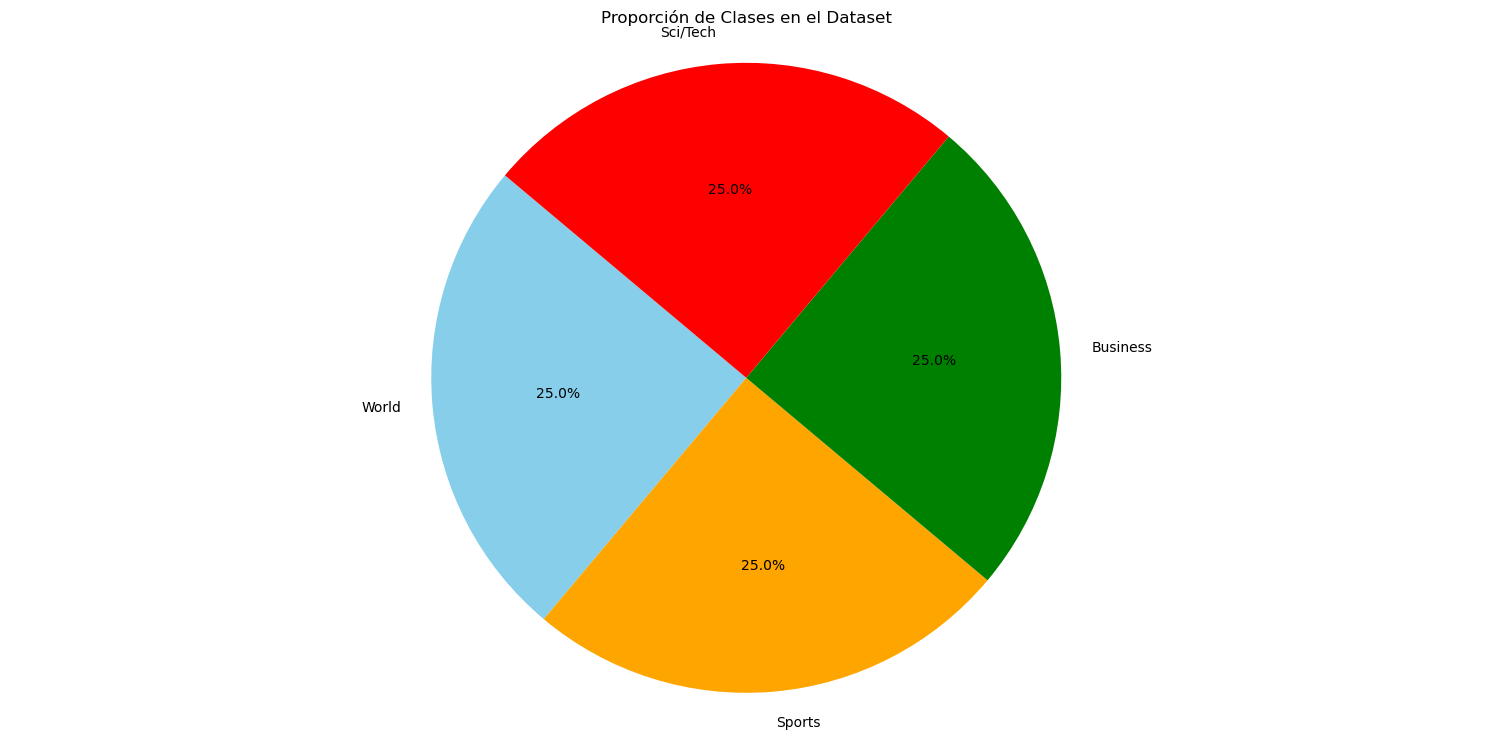

In [7]:
class_counts = data_train['label'].value_counts()

plt.figure(figsize=(19, 9))

plt.pie(class_counts, labels=["World", "Sports", "Business", "Sci/Tech"], autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red'])
plt.title("Proporción de Clases en el Dataset")
plt.axis('equal')

plt.show()

### **Análisis de longitudes de texto**

In [9]:
text_lengths = data_train['text'].apply(lambda x: len(x.split()))
print(text_lengths.describe())

count    120000.000000
mean         37.847450
std          10.085245
min           8.000000
25%          32.000000
50%          37.000000
75%          43.000000
max         177.000000
Name: text, dtype: float64


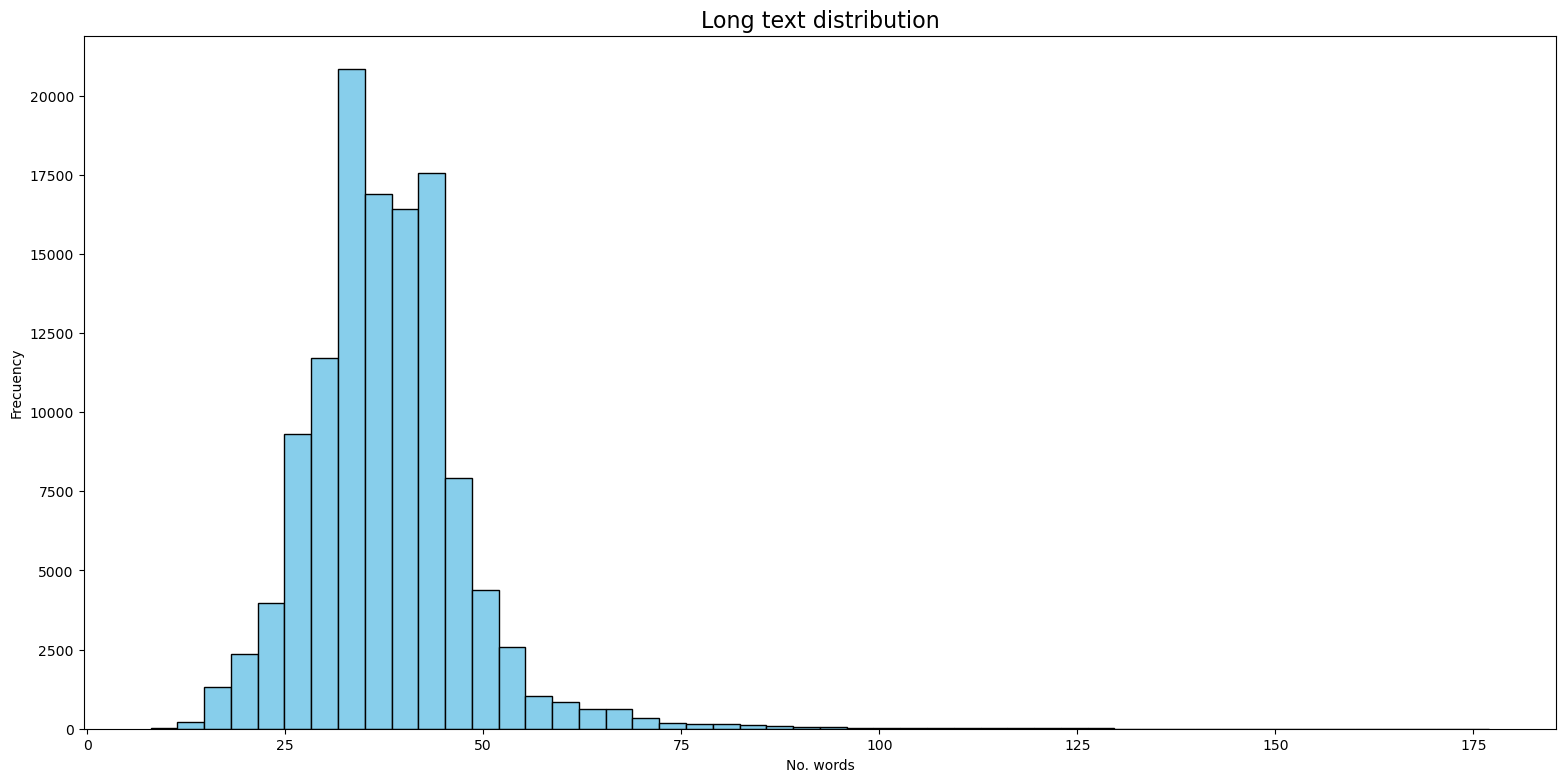

In [10]:
plt.figure(figsize=(19,9))

plt.hist(text_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title("Long text distribution", fontsize=16)
plt.xlabel("No. words")
plt.ylabel("Frecuency")

plt.show()

El **histograma** muestra que la mayoría de los titulares tienen entre **20 y 50 palabras**, con una **disminución gradual** en la frecuencia a medida que los textos se alargan. Algunos textos fuera de este rango son **outliers** y podrían requerir *análisis adicional*.  

Esta **distribución uniforme**, en su mayoría, sugiere *consistencia*, pero sería útil **segmentar las longitudes por clase** para identificar posibles diferencias.  

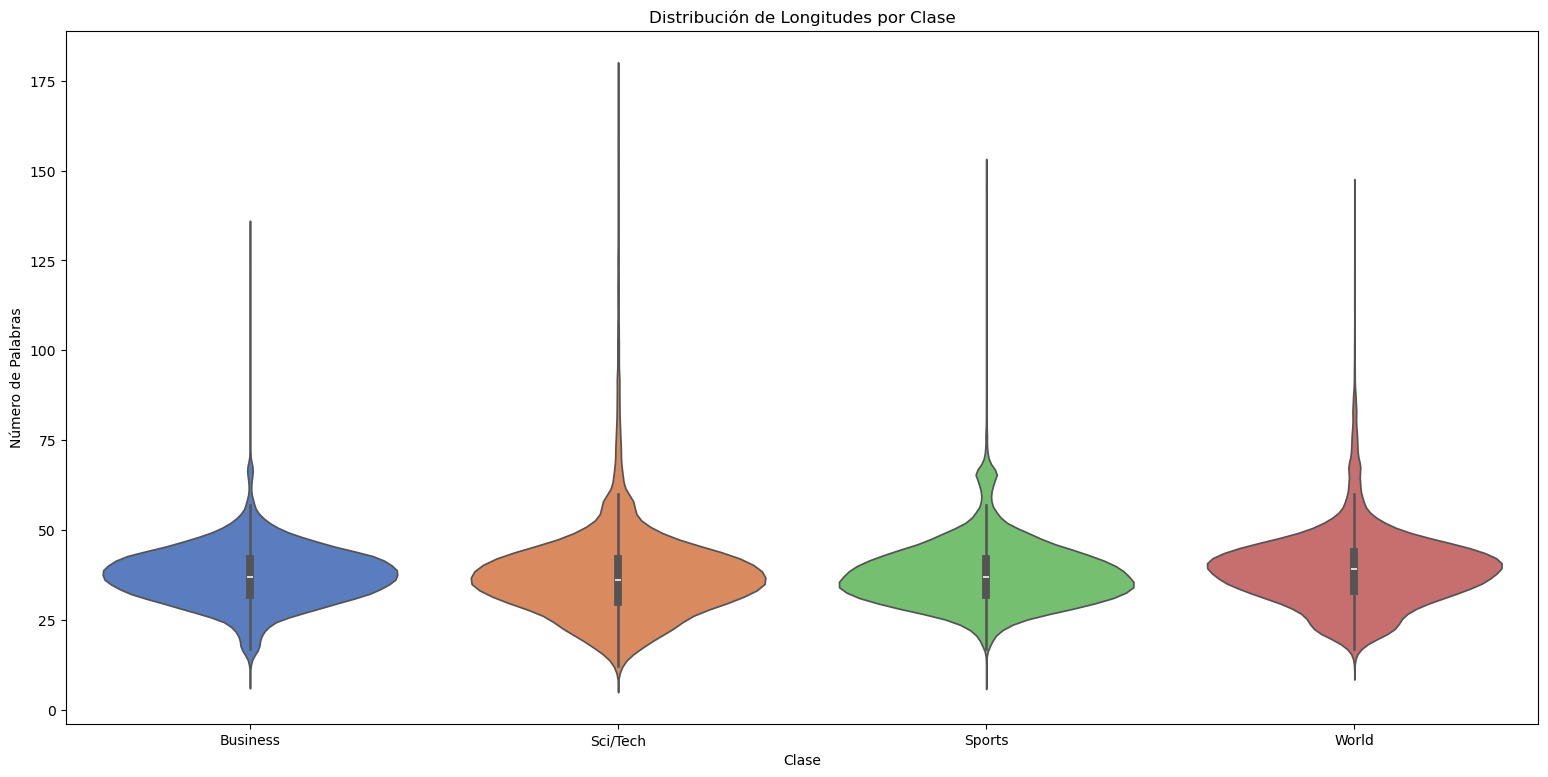

In [53]:
data_train['text_length'] = text_lengths

# Mapeo de etiquetas
label_names = {0: "World", 1: "Sports", 2: "Business", 3: "Sci/Tech"}
data_train['label_name'] = data_train['label'].map(label_names)


plt.figure(figsize=(19, 9))

sns.violinplot(x="label_name", y="text_length", hue="label_name", data=data_train, palette="muted", legend=False)
plt.title("Distribución de Longitudes por Clase")
plt.xlabel("Clase")
plt.ylabel("Número de Palabras")

plt.show()

El **gráfico de violín** muestra que las **longitudes de los textos** son similares entre clases, con **medianas alrededor de 35-40 palabras**. Hay **outliers** en todas las clases, con textos que alcanzan hasta **175 palabras**, siendo la clase **Sci/Tech** *ligeramente más dispersa*.  

### **Word Cloud**

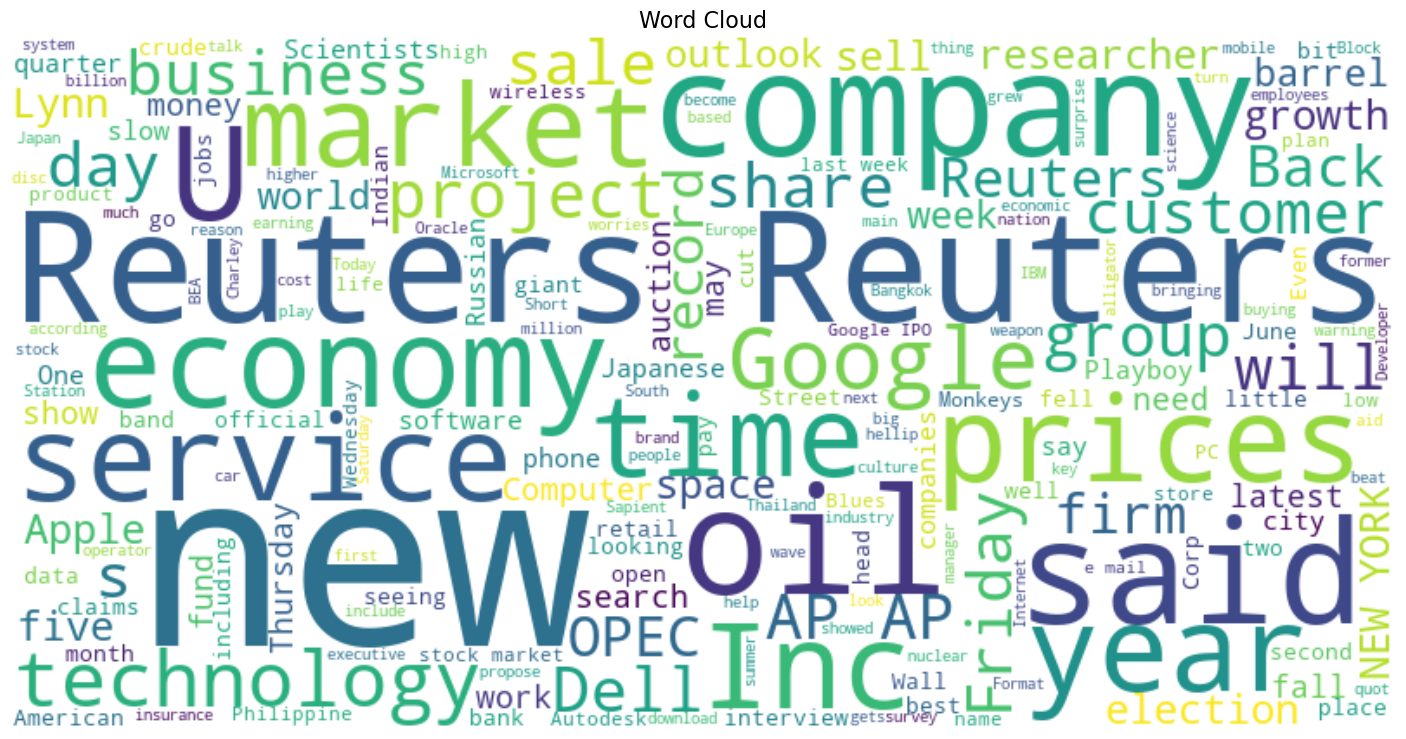

In [10]:
all_text = " ".join(data_train['text'][:100])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(19, 9))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud", fontsize=16)

plt.show()

Analizando esta muestra, podemos detectar ciertos **patrones bastante claros** dentro de la **nube de palabras**:  

1. Vemos bastantes indicios de noticias referidas al **mercado**, **negocios**, **productos** y **servicios**.  
2. El uso frecuente de una fuente destacada: **Reuters**.  
3. La presencia de numerosas **noticias tecnológicas**.  

Después de analizar los datos, podemos concluir que el conjunto de datos es **perfecto** para el trabajo que vamos a llevar a cabo. La **distribución equilibrada de las clases**, la **unicidad de los textos** y la **diversidad de las noticias** aseguran que nuestro modelo tendrá una **base sólida** para *aprender* y **generalizar bien** en diferentes categorías de noticias.  